# Score distribution exploration
Exploration of the scores resulting from various choices in the conference invitee recommendation algorithm.

In [2]:
import jsonlines
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read in data

In [4]:
with jsonlines.open('../data/conference_rec_output/combined_2016_2024_all_scores_basic_21Feb2024_individual_component_scores.jsonl') as reader:
    individual_scores = [obj for obj in reader]
with jsonlines.open('../data/conference_rec_output/combined_2016_2024_all_scores_cutoff50_22Feb2024_individual_component_scores.jsonl') as reader:
    individual_scores_cut = [obj for obj in reader]

In [7]:
comp_scores = pd.read_csv('../data/conference_rec_output/combined_2016_2024_all_scores_basic_21Feb2024_composite_scores.csv', index_col=0)
comp_scores.head()

,composite_score
"hansen, lt",1.0
"jeong, wj",1.0
"yost, ck",1.0
"vanderlinde, em",1.0
"khroustalyova, g",1.0


In [8]:
comp_scores_cut = pd.read_csv('../data/conference_rec_output/combined_2016_2024_all_scores_cutoff50_22Feb2024_composite_scores.csv', index_col=0)
comp_scores_cut.head()

,composite_score
"jeong, wj",1.000000
"yost, ck",1.000000
"vanderlinde, em",1.000000
"hansen, lt",0.995455
"acker, jp",0.991667


In [9]:
with open('../data/conference_rec_output/combined_2016_2024_all_scores_basic_21Feb2024_top_0.05_candidates.txt') as myf:
    candidates = [cand.strip() for cand in myf.readlines()]

## Score distributions with no enrichment cutoff

Text(0.5, 1.0, '50th percentile anrichment threshold')

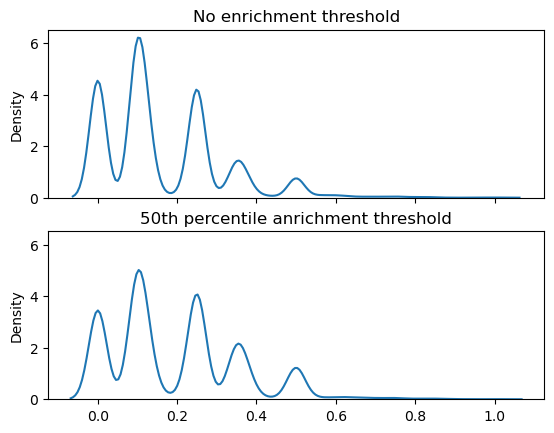

In [14]:
fig, axs = plt.subplots(2,1, sharex=True, sharey=True)

sns.kdeplot(comp_scores, ax=axs[0], legend=False)
axs[0].set_title('No enrichment threshold')
sns.kdeplot(comp_scores_cut, ax=axs[1], legend=False)
axs[1].set_title('50th percentile anrichment threshold')

In [15]:
ind_scores_sep = {
    'Co-citation (without cutoff)': [sc['co_citation'] for sc in individual_scores],
    'Co-author (without cutoff)': [sc['co_author'] for sc in individual_scores],
    'Topic (without cutoff)': [sc['topic'] for sc in individual_scores],
    'Geography (without cutoff)': [sc['geography'] for sc in individual_scores],
    'Co-citation (with cutoff)': [sc['co_citation'] for sc in individual_scores_cut],
    'Co-author (with cutoff)': [sc['co_author'] for sc in individual_scores_cut],
    'Topic (with cutoff)': [sc['topic'] for sc in individual_scores_cut],
    'Geography (with cutoff)': [sc['geography'] for sc in individual_scores_cut]
}

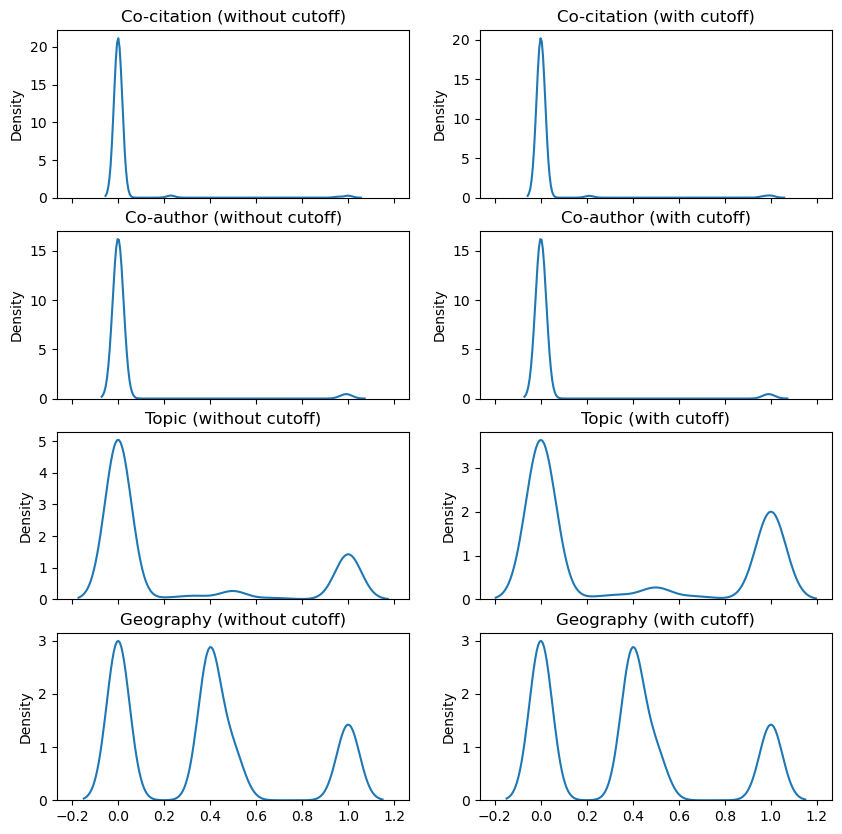

In [23]:
fig, axs = plt.subplots(4, 2, figsize=(10,10), sharex=True)

for ax, sc_name in zip(axs.flat, ['Co-citation (without cutoff)', 'Co-citation (with cutoff)', 'Co-author (without cutoff)', 'Co-author (with cutoff)', 'Topic (without cutoff)',  'Topic (with cutoff)', 'Geography (without cutoff)', 'Geography (with cutoff)']):
    
    sns.kdeplot(ind_scores_sep[sc_name], ax=ax)
    ax.set_title(sc_name)

## Score distributions with an enrichment cutoff
